In [1]:
import os
import sys
import pandas as pd

sys.path.append("..")
from tfbs_check.modules import CNNModule as torch_module
from tfbs_check.dataset import TFBSDataset
from tfbs_check.helper import Helper

from weblogo import seq, seq_io, LogoData
import seqlogo

In [2]:
helper_class = Helper()
helper_class.add_variable("promoters", "../../{0}".format(Helper.PROMOTER_FILE))
helper_class.add_variable("non-promoters", "../../{0}".format(Helper.NONPROMOTER_FILE))
promoter_path = os.path.abspath(helper_class.get_variable("promoters"))
nonpromoter_path = os.path.abspath(helper_class.get_variable("non-promoters"))

ds = TFBSDataset(file=promoter_path, neg_file=nonpromoter_path, binary=False, save_df=False)

In [3]:
def analyse_sequences(seqs):
    logodata = LogoData.from_seqs(seq.SeqList(seqs, alphabet=seq.unambiguous_dna_alphabet))
    pfm = pd.DataFrame(logodata.counts.array)
    ppm = seqlogo.pfm2ppm(pfm)
    ppm_logo = seqlogo.Ppm(ppm)
    display(seqlogo.seqlogo(ppm_logo, ic_scale = True, format = 'svg', size = 'xxxlarge'))

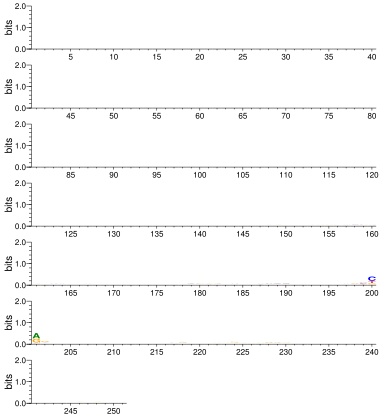

In [4]:
promoter_data = ds.dataframe[ds.dataframe.label == helper_class.get_LABEL_dict()['Promoter']].sequence.to_numpy()
seqs = seq_io.array_io.read(fin=promoter_data)
analyse_sequences(seqs)

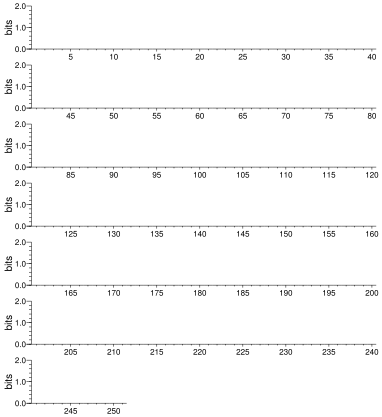

In [5]:
nonpromoter_data = ds.dataframe[ds.dataframe.label == helper_class.get_LABEL_dict()['Non-Promoter']].sequence.to_numpy()
seqs = seq_io.array_io.read(fin=nonpromoter_data)
analyse_sequences(seqs)